In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [119]:
# Loading in all data

customers = pd.read_csv('olist_customers_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv') # will be used later
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
products_english = pd.read_csv('product_category_name_translation.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

In [120]:
# info + head + shape of each DF

print(customers.info())
print(customers.shape)

customers.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [121]:
print(order_items.info())
print(order_items.shape)

order_items.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
order_id         112650 non-null object
order_item_id    112650 non-null int64
product_id       112650 non-null object
seller_id        112650 non-null object
price            112650 non-null float64
freight_value    112650 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB
None
(112650, 6)


,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.9,19.93


In [122]:
print(payments.info())
print(payments.shape)

payments.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [123]:
print(reviews.info())
print(reviews.shape)

reviews.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
review_id                  100000 non-null object
order_id                   100000 non-null object
review_score               100000 non-null int64
review_comment_title       11715 non-null object
review_comment_message     41753 non-null object
review_creation_date       100000 non-null object
review_answer_timestamp    100000 non-null object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None
(100000, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [124]:
print(orders.info())
print(orders.shape)

orders.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB
None
(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [125]:
print(products.info())
print(products.shape)

products.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32951 non-null object
product_category_name         32341 non-null object
product_name_lenght           32341 non-null float64
product_description_lenght    32341 non-null float64
product_photos_qty            32341 non-null float64
product_weight_g              32949 non-null float64
product_length_cm             32949 non-null float64
product_height_cm             32949 non-null float64
product_width_cm              32949 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [126]:
print(sellers.info())
print(sellers.shape)

sellers.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
seller_id                 3095 non-null object
seller_zip_code_prefix    3095 non-null int64
seller_city               3095 non-null object
seller_state              3095 non-null object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None
(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


I've loaded the data + checked for missing/erroneous data. Note: this dataset is from Kaggle and has had duplicates removed.

Some of my initial observations:
- 1) order_items df has 'price' and 'freight_value', which I am going to assume is in Brazil's local currency since this is a dataset from Brazil.
- 2) one order can have multiple products, so we have to make sure we account for this in our analysis.
- 3) orders and customers may have to be joined so we can further analyze the relation.
- 4) payment (installments) - does this mean they pay this reoccuringly? how is this tracked? Is it automatically charged? We may have to make some assumptions based on the dataset.
- 5) reviews df has too columns which can have NaN values - for review title and comments section. (note: I may use this table later on in my analysis, but just loading it in for rn)
- 6) orders df = need to change dates from str to datetime, same for review creation date

In [127]:
#before we move further, lets address #6 above
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [128]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null datetime64[ns]
order_approved_at                99281 non-null datetime64[ns]
order_delivered_carrier_date     97658 non-null datetime64[ns]
order_delivered_customer_date    96476 non-null datetime64[ns]
order_estimated_delivery_date    99441 non-null datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [129]:
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])

In [130]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
review_id                  100000 non-null object
order_id                   100000 non-null object
review_score               100000 non-null int64
review_comment_title       11715 non-null object
review_comment_message     41753 non-null object
review_creation_date       100000 non-null datetime64[ns]
review_answer_timestamp    100000 non-null object
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.3+ MB


## Orders (order_items and orders)

In [131]:
#merging order_items and orders together to map out each order item to an order
order_items = pd.merge(orders, order_items, on='order_id', how='right')

In [132]:
#now we want to merge this new df with product
#but first, let's translate the product table

temp = pd.merge(products, products_english, on='product_category_name')
temp.drop(['product_category_name'], axis=1, inplace = True)

In [133]:
col_order = temp.columns.tolist()
col_order = ['product_category_name_english',
             'product_id',
             'product_name_lenght',
             'product_description_lenght',
             'product_photos_qty',
             'product_weight_g',
             'product_length_cm',
             'product_height_cm',
             'product_width_cm']

temp = temp[col_order]

In [134]:
orders_detailed = pd.merge(order_items, temp, on= 'product_id', how='left')

In [135]:
orders_detailed.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0


In [136]:
orders_detailed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 21 columns):
order_id                         112650 non-null object
customer_id                      112650 non-null object
order_status                     112650 non-null object
order_purchase_timestamp         112650 non-null datetime64[ns]
order_approved_at                112635 non-null datetime64[ns]
order_delivered_carrier_date     111456 non-null datetime64[ns]
order_delivered_customer_date    110196 non-null datetime64[ns]
order_estimated_delivery_date    112650 non-null datetime64[ns]
order_item_id                    112650 non-null int64
product_id                       112650 non-null object
seller_id                        112650 non-null object
price                            112650 non-null float64
freight_value                    112650 non-null float64
product_category_name_english    111023 non-null object
product_name_lenght              111023 non-null float64
product

In [137]:
orders_detailed.rename(index = str, columns = {'product_category_name_english': 'cat_name'}, inplace = True)

In [143]:
#Amount of $ made by category

catname_money = pd.DataFrame(orders_detailed.groupby(['cat_name'])['price'].sum())

#Amount of units sold by category

In [157]:
catname_money.reset_index(level=0, inplace=True)

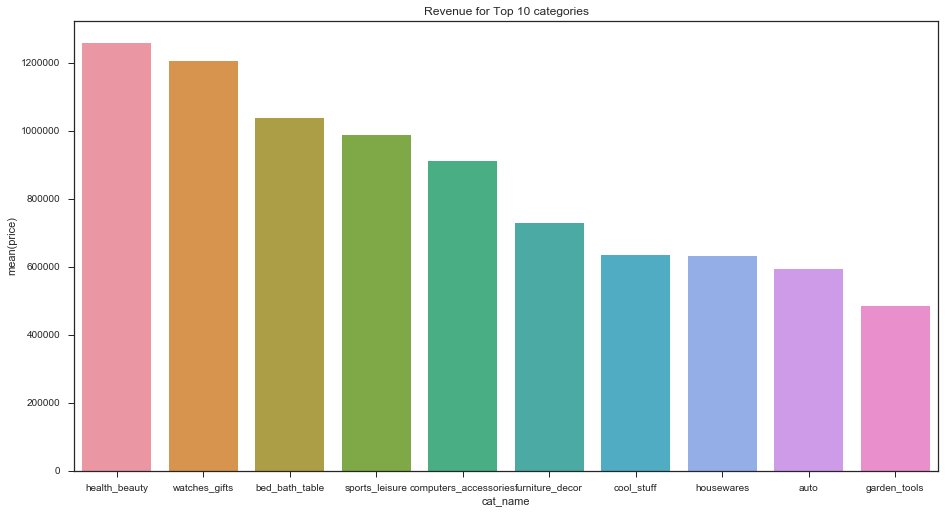

In [191]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15.5, 8.27)

sns.barplot(x='cat_name', y='price', data=catname_money.nlargest(10, 'price')).set_title("Revenue for Top 10 categories")
